In [5]:
import requests                  # 웹 페이지의 HTML을 가져오는 모듈
from bs4 import BeautifulSoup    # HTML을 파싱하는 모듈

# 웹 페이지를 가져온 뒤 BeautifulSoup 객체로 만듦
response = requests.get('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
soup = BeautifulSoup(response.content, 'html.parser')
 
table = soup.find('table', { 'class': 'table_develop3' })    # <table class="table_develop3">을 찾음
data = []                            # 데이터를 저장할 리스트 생성
for tr in table.find_all('tr'):      # 모든 <tr> 태그를 찾아서 반복(각 지점의 데이터를 가져옴)
    tds = list(tr.find_all('td'))    # 모든 <td> 태그를 찾아서 리스트로 만듦
                                     # (각 날씨 값을 리스트로 만듦)
    for td in tds:                   # <td> 태그 리스트 반복(각 날씨 값을 가져옴)
        if td.find('a'):             # <td> 안에 <a> 태그가 있으면(지점인지 확인)
            point = td.find('a').text    # <a> 태그 안에서 지점을 가져옴
            temperature = tds[5].text    # <td> 태그 리스트의 여섯 번째(인덱스 5)에서 기온을 가져옴
            humidity = tds[9].text       # <td> 태그 리스트의 열 번째(인덱스 9)에서 습도를 가져옴
            data.append([point, temperature, humidity])    # data 리스트에 지점, 기온, 습도를 추가
 
data    # data 표시. 주피터 노트북에서는 print를 사용하지 않아도 변수의 값이 표시됨

[['서울', '25.6', '30'],
 ['백령도', '18.4', '62'],
 ['인천', '20.8', '54'],
 ['수원', '25.0', '41'],
 ['동두천', '24.9', '34'],
 ['파주', '25.1', '39'],
 ['강화', '20.0', '56'],
 ['양평', '25.5', '32'],
 ['이천', '25.6', '28'],
 ['북춘천', '24.6', '36'],
 ['북강릉', '19.9', '56'],
 ['울릉도', '16.8', '77'],
 ['속초', '19.1', '75'],
 ['철원', '23.9', '37'],
 ['대관령', '17.9', '49'],
 ['춘천', '25.7', '39'],
 ['강릉', '22.7', '41'],
 ['동해', '19.5', '77'],
 ['원주', '23.4', '36'],
 ['영월', '24.2', '34'],
 ['인제', '24.3', '31'],
 ['홍천', '25.4', '25'],
 ['태백', '19.6', '43'],
 ['정선군', '23.0', '32'],
 ['서산', '23.6', '49'],
 ['청주', '24.3', '33'],
 ['대전', '25.1', '37'],
 ['충주', '24.4', '32'],
 ['추풍령', '23.0', '35'],
 ['홍성(예)', '24.3', '46'],
 ['제천', '24.2', '32'],
 ['보은', '23.7', '28'],
 ['천안', '23.5', '35'],
 ['보령', '21.4', '56'],
 ['부여', '23.9', '37'],
 ['금산', '23.7', '30'],
 ['전주', '24.9', '44'],
 ['광주', '24.0', '35'],
 ['목포', '22.8', '51'],
 ['여수', '22.8', '49'],
 ['흑산도', '19.2', '93'],
 ['군산', '21.8', '55'],
 ['완도', '23.2', '45'],

In [6]:
with open('weather.csv', 'w') as file:    # weather.csv 파일을 쓰기 모드로 열기
    file.write('point,temperature,humidity\n')                  # 컬럼 이름 추가
    for i in data:                                              # data를 반복하면서
        file.write('{0},{1},{2}\n'.format(i[0], i[1], i[2]))    # 지점,온도,습도를 줄 단위로 저장

In [7]:
# %matplotlib inline을 설정하면 matplotlib.pyplot의 show 함수를 호출하지 않아도
# 주피터 노트북 안에서 그래프가 표시됨
%matplotlib inline
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
 
# csv 파일을 읽어서 DataFrame 객체로 만듦. 인덱스 컬럼은 point로 설정
df = pd.read_csv('weather.csv', index_col='point', encoding='utf-8')
df    # df 표시

,temperature,humidity
point,,
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
...,...,...
합천,25.1,32
밀양,24.7,34
산청,24.8,41


In [8]:
# 특별시, 광역시만 모아서 DataFrame 객체로 만듦
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]
city_df    # city_df 표시

,temperature,humidity
point,,
서울,25.6,30
인천,20.8,54
대전,25.1,37
대구,25.7,31
광주,24.0,35
부산,20.2,66
울산,19.7,70


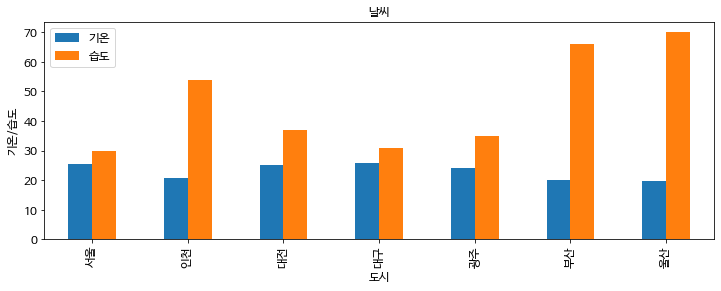

In [9]:

font = mpl.font_manager.FontProperties(fname='/Library/Fonts/NanumBarunGothic.ttf').get_name()
mpl.rc('font', family=font)
# 차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정
ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)          # x축 정보 표시
ax.set_ylabel('기온/습도', fontsize=12)     # y축 정보 표시
ax.legend(['기온', '습도'], fontsize=12)    # 범례 지정

'/Users/pch/.matplotlib'

In [1]:
import sys
print(sys.executable)
print(sys.path)

/Library/Frameworks/Python.framework/Versions/3.9/bin/python3
['/Users/pch/study/coding-studio/unit46', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python39.zip', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/lib-dynload', '', '/Users/pch/Library/Python/3.9/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages', '/Users/pch/Library/Python/3.9/lib/python/site-packages/IPython/extensions', '/Users/pch/.ipython']


In [4]:
!pip3 install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
     |████████████████████████████████| 115 kB 1.7 MB/s eta 0:00:01
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4 ... done
